# Precision, recall, and $F$-scores

## Motivation: a Covid test

What is the difference between

$$\mathbb P (\hat y = 1|y=1) \qquad \mbox{and}\qquad \mathbb P(y=1|\hat y=1)?$$

The first one measures, *out of all points in the positive class*, how many we got right. The second one measures, *out of all points predicted to be in the positive class*, how many were actually positives.

These quantities are not the same. Writing them like this makes this fact obvious, but it is surprising how many times we can mix them up in conversation. For instance:

> I just got a positive in my Covid test. They say that it is right 99% of the time when you are infected, so I am probably infected.

The conclusion above is a falacy, because we do not have enough data. Does the person mean

$$\mathbb P (\mbox{test gives positive | you have Covid}) = 99\%$$
or
$$\mathbb P (\mbox{ you have Covid | test gives positive}) = 99\%?$$

These two cases are completely different, as we show below.

For instance, in the case above, let $y=1$ denote if someone has Covid, and $\hat y = 1$ denote that they tested positive. 

Let us assume that 

$$\mathbb P (\hat y=1 | y=1) = 99\%$$


We can write, using Bayes' theorem,

$$\mathbb P(y=1|\hat y=1) = \frac{\mathbb P (\hat y=1 | y=1) \mathbb P(y=1)}{\mathbb P (\hat y=1)}$$

or, expanding the denominator,

$$\begin{align}
\mathbb P(y=1|\hat y=1) &= \frac{\mathbb P (\hat y=1 | y=1) \mathbb P(y=1)}{\mathbb P (\hat y=1|y=0) \mathbb P(y=0) + \mathbb P(\hat y = 1|y=1) \mathbb P(y=1)}\\
&= \frac{1}{\displaystyle1 + \frac{\mathbb P(\hat y=1 | y=0) \mathbb P(y=0)}{\mathbb P(\hat y=1|y=1) \mathbb P(y=1)}}
\end{align}$$

Assume that:
* 1% of the population is infected, ie. $\mathbb P(y=1) = 0.01$ and $\mathbb P(y=0) = 0.99$
* If you are infected, there is a 99% chance the test will come back positive: $\mathbb P(\hat y=1|y=1) = 0.99$
* If you are not infected, there is a 5% chance the test will come back as a (false) positive: $\mathbb P(\hat y=1|y=0) = 0.05$

Then, from the expression above we get

$$\mathbb P(y=1|\hat y=1) = \frac{1}{\displaystyle 1 + \frac{0.05 \times 0.99}{0.99 \times 0.01}} = \frac 16 \approx  16.7\%$$ 

that is, if your test comes back positive, there is only a 16.7% chance that you actually have Covid.

This is a *significantly* smaller number than the 99% we started with (and also shows why a "test with 99% confidence" does not mean much by itself). This is why $\mathbb P (\hat y = 1|y=1)$ and $\mathbb P(y=1|\hat y=1)$ are *very* different things.

> One might argue that the test is bad. It is not. To see why, think about it this way. Without having taken a test, your prior chance of being infected was 1%. Now that you have taken the test, this chance grows by **almost 17 times**. This is a huge growth! It is just not a definitive answer. Indeed, one could **take the test again** and see how much the probability changes. 

*Problem*. Suppose we test again, and again we get a positive. Convince yourself that we can calculate the new probability of being infected by formally starting out from the exact same formula above but changing the prior probability of being infected to $\mathbb P (y=1) = 1/6$ (which implies $\mathbb P(y=0) = 5/6$), yielding

$$\mathbb P(y=1|\hat y_1=1, \hat y_2 = 1) = \frac{1}{\displaystyle 1 + \frac{0.05\times 5/6}{0.99 \times 1/6}} \approx 80\%,$$

which is now much higher. If we further test again this number increases to 99%, and so on. 

## Precision and recall

$$
\boxed{\mathrm{Recall} = \mathbb P (\hat y = 1|y=1)}$$
$$\boxed{\mathrm{Precision} = \mathbb P(y=1|\hat y=1)}$$

For the Covid test above, it had a recall of 99% and a precision of 16.7% for the positive class.

For multiclass models (which generalize the binary case we see here), one calculates precision/recall for each class. For instance, if you have an image classification model which classifies an image into $\{\mathrm{dog, cat, horse, penguin}\}$ then you should calculate precision/recall for each class: 

$$\mathrm{Recall_{dog}} = \mathbb P (\hat y = \mathrm{dog} | y = \mathrm{dog}),\quad \mathrm{Recall_{cat}} = \mathbb P (\hat y = \mathrm{cat} | y = \mathrm{cat})$$ 

and so on.

## The precision & recall (PR) curve 

Similar to what we did to the ROC curve, we can consider the curve obtained by building a score $f$ and a classifier $\hat y(x) = 1$ if $f(x) \geq \lambda$ and 0 otherwise, and see how precision and recall change as we do that.

For the sample model we have been using so far, the curve can be seen in the curve below.

> We build a custom function which also plots the **percentage of the positive class against the whole dataset**, ie. $\mathbb P(y=1)$. This is an important quantity, and so we make it explicit here.

In [41]:
def plot_precision_recall(y_true, y_pred, ax):
    
    from sklearn.metrics import PrecisionRecallDisplay

    PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax)
    ax.set_ylim(-.05,1.05)
    
    # prevalence of positive class
    p = y_true.sum()/len(y_true)
    ax.axhline(p, linestyle='--', color='gray', label=f'Prevalence ({round(p,2)})')
    plt.legend()

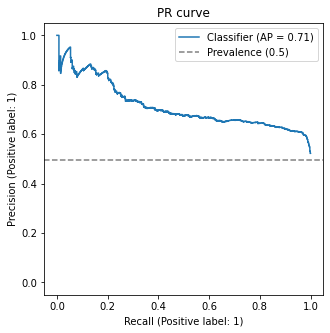

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
plot_precision_recall(y_test, y_test_pred, ax)
plt.title("PR curve")
plt.show()

(this function gives the average precision (AP) metric as well - we shall discuss it later)

Notes:

* For a very small threshold $\lambda = -\infty$, we have 

  $$\mathrm{Recall}(-\infty) = 1,\quad \mathrm{Precision}(-\infty) = \pi_1$$ 
  
  where $\pi_1 = \mathbb P(y=1)$ is the prevalence of the positive class (can you see why?);
* The curve is indeed bounded below by the prevalence $\pi_1$;
* As we increase the threshold, the curve increases in precision and reduces in recall
* For $\lambda = \infty$, we should have 

  $$\mathrm{Recall}(\infty) = 0,\quad \mathrm{Precision}(\infty) = 1$$
  
  (can you see why?)

This curve has more interesting properties that we shall see later, after we better understand the geometry of the PR plane.

## The $F$-scores: joining precision and recall

Recall that, given two numbers $a, b$, their **harmonic mean** is the number $c$ defined via

$$\frac 1c = \frac 12 \left( \frac 1a + \frac 1b \right),$$

or explicitly

$$c = \frac{2}{1/a + 1/b} = \frac{2ab}{a+b}$$

(if any of the numbers is 0, the harmonic mean is undefined; if any of them is infinite, the harmonic mean will be the finite one left, as can be seen by taking the limit in the first definition)

We define the **$F_1$ score** as the harmonic mean of precision and recall:

$$\boxed{\frac{1}{F_1} = \frac 12 \frac{1}{\mathrm{Precision}} + \frac 12 \frac{1}{\mathrm{Recall}}}$$

More generally, we define the **$F_\beta$ score** as a weighted harmonic mean between precision and recall:

$$\boxed{\frac{1}{F_\beta} = \frac{1}{1+\beta^2} \frac{1}{\mathrm{Precision}} + \frac{\beta^2}{1+\beta^2}\frac{1}{\mathrm{Recall}}}$$

or the straighforward version

$$F_\beta = \frac{(1+\beta^2) \mathrm{Recall\, Precision}}{\beta^2 \mathrm{Precision + Recall}}$$

For $\beta = 1$ we retrieve $F_1$, which weighs precision and recall equally; for $\beta > 1$ we give a higher importance to recall, whereas for $\beta < 1$ we place more importance on precision.

### Why do we use a *harmonic* mean for the F-score?

One could argue that there is no need to use a harmonic mean of recall and precision to estimate their (weighted) average. It would be enough to calculate a (weighted) simple average $(\mathrm{precision+recall})/2$, which still captures the trade-off between precision and recall.

The advantage of using the harmonic mean comes when considering extremes. A simple average $(x+y)/2$ is forgiving if either $x$ or $y$ become 0 (see the figure below, top-left: there are non-zero simple averages at both the $x=0$ and $y=0$ axes). Harmonic means are not so forgiving: if $x$ or $y$ tend to zero, then their harmonic mean will also go to zero. 

> Notice that there is always **one choice** of precision and recall that will maximize the simple average: $\mathrm{Recall} = 0$ and $\mathrm{Precision} =1$, which corresponds to the trivial $\lambda=\infty$ model which labels every point as 0. Thus, if we tried to maximize the simple average, we would just obtain this trivial model.

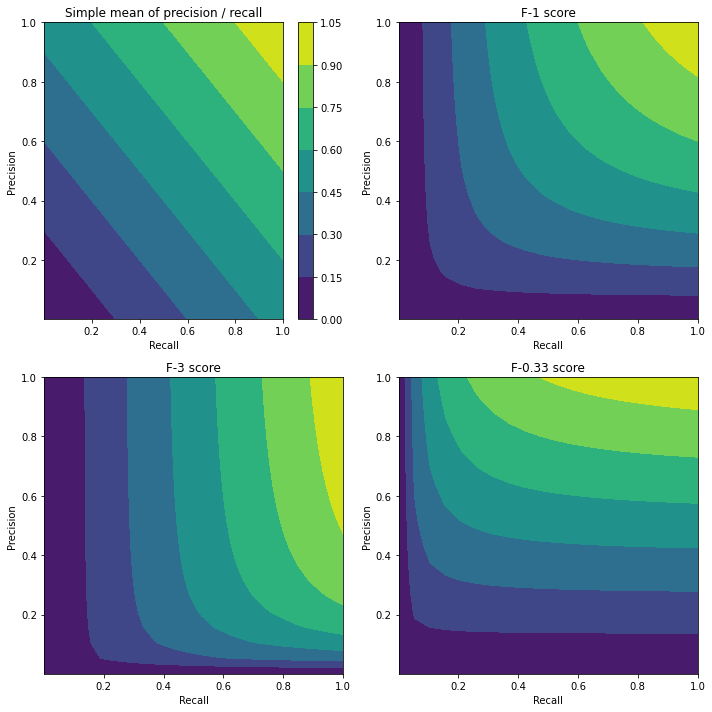

In [43]:
## Plotting simple and (weighted) harmonic averages of precision and recall

prec = np.linspace(0.001,1, num=20)
rec = np.linspace(0.001,1, num=20)

rec, prec = np.meshgrid(rec, prec)

def f_beta(precision, recall, beta):
    return (1+beta**2)*precision*recall/(beta**2 * precision + recall)

# simple mean
simp = (rec+prec)/2

fig, ax = plt.subplots(figsize=(10,10), ncols=2, nrows=2)
ax = ax.flatten()

# simple mean
heatmap = ax[0].contourf(rec, prec, simp)
ax[0].set_xlabel("Recall")
ax[0].set_ylabel("Precision")
ax[0].set_title("Simple mean of precision / recall")
cbar = fig.colorbar(heatmap, ax=ax[0])

recall_line = np.linspace(0,1)
for i, beta in enumerate([1, 3, 0.33]):
    k=i+1
    ax[k].contourf(rec, prec, f_beta(prec, rec, beta=beta))
    ax[k].set_xlabel("Recall")
    ax[k].set_ylabel("Precision")
    ax[k].set_title(f"F-{beta} score")

plt.tight_layout()
plt.show()

## Should I prioritize precision or recall? Which matters most?

A rule-of-thumb to keep in mind is:

$$\mathrm{Precision \sim } \quad \mbox{focus on minimizing false positives}$$
$$\mathrm{Recall \sim } \quad \mbox{ focus on minimizing false negatives}$$

False positives and false negatives are never what we wish for, but there is always a trade-off on which is worse for the problem at hand. Consider the situations below:

**Treatment for a disease.**
You work in medical research, and you are developing a test for a specific colon disease. This disease is lethal - if a person has it and is not treated there is a high chance they will die. 

There already exists a very accurate test to diagnose this disease, but it is time-consuming and very uncomfortable for the patient. Your company wants to create a cheaper and less uncomfortable test, which can be done quickly at a doctor's office, but will also be less accurate. The idea here is that, if a patient tests positive under this quicker test, only then will they take the more time-consuming and uncomfortable one, as a means of validation.

> **Question**: which do you prioritize, precision or recall?

> Solution: consider what happens if you have a false negative (=the patient is sick, but your test returns negative). Since the disease is lethal, this means this patient might die. Now consider a false positive (=patient is not sick, but your test returns positive). Then they will need to go through an uncomfortable test, but they will not die. In this case, **false negatives are much worse than false positives**. Because of this, our focus is on high recall.

**Product recommendation**. You work in an e-commerce company, and are developing a product recommendation model. Basically, when the user enters your homepage, you want to recommend products to them based on their profile, previous purchases etc which will maximize the chances they will buy again. The product recommendations will be displayed, 5 at a time, in a "Recommended for you" tab.

Usually, product recommendation models are not just binary classifiers, but for the sake of simplicity let's assume they are. Then, our model is a classification model which outputs a score: high scores indicate a user is likely to purchase something, and low scores mean the opposite.

> **Question**: which do you prioritize, precision or recall?

> Solution: a false positive here means a product which you recommend, but the user is not really likely to buy. A false negative is a product they would have liked, but you don't recommend. If you want to maximize the likelihood a user will buy a product, you want to make sure you only show them the top 5 products they will like: few false positives. It is OK, however, to have products that they would like but you don't end up recommending. What you want to avoid is that they enter the page, don't find anything they like, and leave. **False positives are worse than false negatives here**, so the focus is on high precision.

## Average Precision (AP): very used but questionable metric

The so-called *average precision* is the **area under the PR curve**:

In [44]:
from sklearn.metrics import auc, average_precision_score, precision_recall_curve

In [45]:
# Directly using the sklearn implementation
print("Avg. Precision: {0:.3f}".format(average_precision_score(y_test, y_test_pred)))

Avg. Precision: 0.714


In [46]:
# calculating the curve and using numeric integration
prec, rec, thresh = precision_recall_curve(y_test, y_test_pred)

# Directly using the sklearn implementation
print("Avg. Precision: {0:.3f}".format(auc(rec, prec)))

Avg. Precision: 0.714


The reasoning behind using this metric is that, since the endpoints of the PR curve are fixed, higher area means a better classifier.

This is true in general. However, it might be problematic to use for several reasons:
* If you look at how jagged the PR curve is, it makes you want to "smoothen it out" in the same way we do for the ROC curve: by taking its convex hull. However, this is not possible - the PR plane has no convexity properties. Hence the area under the curve would be an integral of a pretty jagged function
* Even if you calculate the area well, you have an issue: there is no interpretation for the Average Precision
* The PR curve is bound below by $\mathrm{Precision} = \pi_1$, the prevalence of the minority class. That means that it has an area of at least $1\times \pi_1 = \pi_1$. This is an issue: suppose you want to consider a model that you trained on two different customer segments, A and B. Even if $\mathrm{AP}_A \geq \mathrm{AP}_B$, this doesn't mean the model works better on A than B, since the prevalence might be different between the classes. If A has higher prevalence, then the area will naturally tend to be greater.


## PR is not good under imbalance

**For this section, assume that we want to find the model with the best $F_1$ score**

A common question among data scientists is - which should I use to assess my model, the ROC curve or the PR curve?

The answer is of course to use both, since they tell different stories. Mathematically, however, the ROC is definitely "nicer":

|Features of the ROC | Feature of PR|
|---|---|
|Interpretable area under the curve ROC AUC = $\mathbb P (Z_1 \geq Z_0)$|**AUC PR** not interpretable|
|Invariant under class imbalance|The whole curve shifts when the imbalance ratio shifts|
|Universal baseline: 45 degree line|No universal baseline|
|Meaningful convex hull|Not linear - cannot take convex hull|

### **Why is the curve not invariant under imbalance?**

Recall from our discussion of the ROC curve that its $x$ and $y$ axes (FPR and TPR, respectively) do not change, mathematically speaking, if the ratio 

$$r = \mbox{total positives / total negatives} = \mathbb P (Y=1)/\mathbb P(Y=0)$$

changes. *This will not be the case for precision and recall*. To see this, let 

$$\mathrm{ROC}:\quad \begin{align}
\mathbf x &= \mbox{FPR} = \mathbb P (\hat y = 1|y = 0)\\
\mathbf y &= \mbox{TPR} = \mathbb P(\hat y =1|y=1)
\end{align}$$

be the coordinates of the ROC curve, and let 

$$\mathrm{PR}:\quad \begin{align}
\mathbf x' &= \mathrm{Recall} = \mathbb P(\hat y =1|y=1)\\
\mathbf y' &= \mathrm{Precision} = \mathbb P(y =1|\hat y=1)
\end{align}$$

be those of the PR curve. 

Here, $\mathbf x$ and $\mathbf y$ are invariant under changes. Our goal is to express the primed coordinates in terms of the unprimed ones.

**Claim:** the precision and recall curve can be expressed as a *change of coordinates* of the ROC curve via

$$\boxed{\begin{align}
\mathbf x' &= \mathbf y\\
\mathbf y'&= \frac{\mathbf y}{\mathbf y+ \mathbf x/r}
\end{align}}$$

Then: all else being equal, recall is invariant under shifts in $r$, but **precision decreases**.

*Proof*: there is nothing to prove regarding recall $\mathbf x'$. For precision, we use Bayes' rule:

$$\begin{align}
\mathbf y'&= \mathbb P(y =1|\hat y=1)\\
&= \frac{\mathbb P(\hat y =1| y=1) \mathbb P (y=1)}{\mathbb P(\hat y =1| y=1) \mathbb P (y=1)+\mathbb P(\hat y =1| y=0) \mathbb P (y=0)}\\
&= \frac{\mathbf y \mathbb P (y=1)}{\mathbf{y} \mathbb P (y=1)+ \mathbf x \mathbb P (y=0)}\\
&= \frac{\mathbf y }{\displaystyle \mathbf{y} + \mathbf x  \frac{\mathbb P (y=0)}{\mathbb P (y=1)}}\\
&= \frac{\mathbf y }{\displaystyle \mathbf{y} + \frac{\mathbf x}{r}} \quad \Box
\end{align}$$

Therefore, if $r$ shifts, 
* The precision curve naturally goes down
* The area under the precision curve also goes down
* Since (prove it)

$$F_\beta = \frac{(1+\beta^2) \mathbf{y}}{\displaystyle \mathbf{y} + \frac{\mathbf x}{r} +\beta^2}$$

  then $F$-scores suffer from the same problem as precision.


### Visual proof of non-convexity in PR space

We have claimed above that a convex hull makes no sense in the PR space. We show this intuitively now.



We have previously created a function to calculate the convex hull of the ROC curve:

In [47]:
from sklearn.metrics import roc_curve

_, fpr_hull, tpr_hull = hull_roc_auc(y_test, y_test_pred)
fpr, tpr, _ = roc_curve(y_test, y_test_pred)

We use the transformation derived above to plot these points on the PR plane. Technically speaking, we only have the vertices of the hull, so we need to create a linear interpolation to have more points to plot.

In [48]:
from scipy.interpolate import interp1d  # for 1d interpolation

In [49]:
pr_interp = interp1d(fpr_hull, tpr_hull)

In [50]:
x_hull = np.linspace(0,1,num=500)
y_hull = pr_interp(x_hull) 

Now we apply the transformation and plot both the original ROC and its hull in the PR planme

In [51]:
r = (y_test==1).sum()/(y_test==0).sum()

In [52]:
def from_roc_to_pr(x, y, r):

    from warnings import catch_warnings, simplefilter
    
    with catch_warnings():
        simplefilter("ignore")
        return y, y/(y+x/r)

In [53]:
rec, prec = from_roc_to_pr(fpr, tpr, r)
rec_hull, prec_hull = from_roc_to_pr(x_hull, y_hull, r)
rec_hull_markers, prec_hull_markers = from_roc_to_pr(fpr_hull, tpr_hull, r)

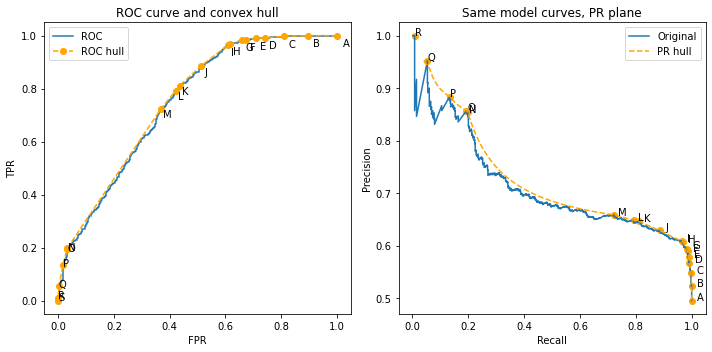

In [54]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2)

import string

ax[0].plot(fpr, tpr, label='ROC')
ax[0].plot(fpr_hull, tpr_hull, label='ROC hull', marker='o', linestyle='--', color='orange')
ax[0].legend()
ax[0].set_title("ROC curve and convex hull")
ax[0].set_xlabel("FPR")
ax[0].set_ylabel("TPR")

for letter, i in zip(string.ascii_uppercase, range(len(fpr_hull))):
    ax[0].annotate(letter, (fpr_hull[i]*1.02, tpr_hull[i]*0.96))


ax[1].plot(rec, prec, label='Original')
ax[1].plot(rec_hull, prec_hull, label='PR hull', linestyle='--', color='orange')
ax[1].scatter(rec_hull_markers, prec_hull_markers, marker='o', color='orange')

for letter, i in zip(string.ascii_uppercase, range(len(rec_hull_markers))):
    ax[1].annotate(letter, (rec_hull_markers[i]*1.02, prec_hull_markers[i]))
    
ax[1].legend()
ax[1].set_title("Same model curves, PR plane")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")

plt.tight_layout()
plt.show()

As you can see, the hull is mapped to a very non-convex shape; the part between points M and N shows clearly that the hull becomes curved in this new space. Therefore, starting out from the PR curve, there is no simple linear structure as the one we had in the ROC plane.
> Indeed, since the mapping is $x'= y$ and $y'= y/(y+x/r)$, any straight line $y = ax+ b$ becomes, in primed variables,

$$y'= \frac{x'}{\displaystyle x'+ \frac 1r (\frac ya - b)} =  \frac{1}{\displaystyle 1+ \frac 1{ra} - \frac{b}{rx'}}$$

The imbalance issue is partially fixed in the next section.

---

# Advanced topic: harmonic precision and recall

## What is a baseline to compare models?

In the ROC case, the family of random classifiers corresponds to the 45 degree line and it is a universal baseline.

In the PR case, we don't have that. Instead, we know the "worst" classifier is the one in the bottom right-hand corner of the PR plane, namely the "all-positives" model predicting $\hat y=1$ for all $x$, which has recall equal to 1 and precision equal to $\pi_1 = \mathbb P(Y=1)$. This model has an $F_1$ score of

$$(F_1)_\mathrm{baseline} = \frac{2\pi_1}{1+\pi_1}$$

**If the metric we care the most about is $F_1$**, (as is the assumption in this section), then there is no point in choosing a model with $F_1 < (F_1)_\mathrm{baseline}$. This constraint actually splits the PR plane into two components, separated by

$$F_1 = (F_1)_\mathrm{baseline}\quad \Rightarrow\quad \frac{1}{\mathrm{Precision}} + \frac{1}{\mathrm{Recall}} = 1 + \frac{1}{\pi_1}$$

<ipython-input-55-e47806ebc338>:13: RuntimeWarning: divide by zero encountered in true_divide
  frontier = np.where(xaxis < pi,1, 1/(1 + 1/pi - 1/xaxis))


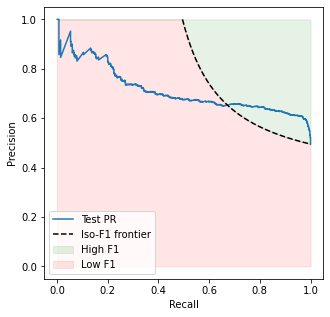

In [55]:
plt.subplots(figsize=(5,5))

plt.plot(rec, prec, label='Test PR')

# build baseline model
pi = y_test.mean()

baseline_rec = np.linspace(pi, 1)
baseline_prec =  1/(1 + 1/pi - 1/baseline_rec)

# for plotting purposes
xaxis = np.linspace(0,1)
frontier = np.where(xaxis < pi,1, 1/(1 + 1/pi - 1/xaxis))

plt.fill_between(xaxis, 1, frontier, color='green', alpha=0.1, label='High F1')
plt.fill_between(xaxis, 0, frontier, color='red', alpha=0.1, label='Low F1')

plt.plot(baseline_rec, baseline_prec, label='Iso-F1 frontier', linestyle='--', color='black')
plt.legend(loc='lower left')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In this sense, all classifiers lying in the red zone are worse than the all-positive one. We want to find models which somehow maximize our "presence" in the green region.

> This discussion assumes we want to maximize $F_1$. One could define analogous Iso-$F_\beta$ curves for other use cases.

> By symmetry of the hyperbola, we see that models with $\mathrm{Recall} < \pi_1$ are completely excluded, because all of them have $F_1$ smaller than the baseline one.

## How can we fix the imbalance problem?


The main issue that PR has is imbalance. Somehow we want to create a universal baseline which allows us to compare eg. areas under the curve across datasets in a meaningful way. It turns out we can do this with a proper **rescaling** of the precision and recall metrics.

**Def [harmonic rescaling]**. Let $a, b$ with $b>a>0$ be two real paramters. The harmonic rescaling of a number $x \neq 0$ betweeen $a$ and $b$ is

$$\mathrm{hScale}(x; a, b) = \frac{1/x-1/a}{1/b-1/a}$$

Notice that this is different from a linear rescaling $(x-a)/(b-a)$ (in fact, the harmonically scaled variable is larger than its linear counterpart) but both make it so that the variable takes the value 0 at $x=a$ and 1 at $x=b$.

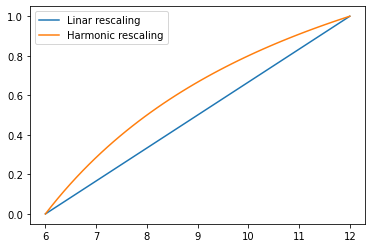

In [56]:
a, b = 6, 12
x = np.linspace(a, b)
plt.plot(x, (x-a)/(b-a), label='Linar rescaling')
plt.plot(x, (1/x-1/a)/(1/b-1/a), label='Harmonic rescaling')
plt.legend()
plt.show()

**Def [harmonic precision & recall]** Let $\pi_1 = \mathbb P (y=1)$ be the prevalence of class 1. The harmonic precision and recall are defined as

$$\boxed{\mathrm{hPrecision} := \mathrm{hScale}(\mathrm{Precision}; a=\pi_1, b=1)}$$
$$\boxed{\mathrm{hRecall} := \mathrm{hScale}(\mathrm{Recall}; a=\pi_1, b=1)}$$

Notice that this will map precision from $[\pi_1,1]$ into $[0,1]$ perfectly. For recall, there are two domains: the part with recall in $[0, \pi_1]$ will be mapped to negative harmonic recall, whereas the region $[\pi_1, 1]$ will be mapped to positive harmonic recalls.

> Again, in the situation where $F_1$ is our reference metric, it is OK to ignore the negative harmonic recall region, since all models in this region perform worse than the baseline model.

Because of that, the $y$-axis intercept (ie. the point where $\mathrm{hRecall}=0$) happens not at $\mathrm{hPrecision} = 1$, but at some point between 0 and 1.

In [57]:
def harm_scale(x, a, b):

    from warnings import catch_warnings, simplefilter
    
    with catch_warnings():
        simplefilter("ignore")
        res = (x-a)*b/(x* (b-a))
    return res

def from_pr_to_harmonic_pr(rec, prec, r):
    
    pi1 = r/(r+1)
    hprec = harm_scale(prec, pi1, 1)
    hrec  = harm_scale(rec, pi1, 1)
    
    # restrict to [0,1]
    restriction = hrec >= 0
    hrec, hprec = hrec[restriction], hprec[restriction]
    
    return hrec, hprec


def from_roc_to_harmonic_pr(fpr, tpr, r):
    
    rec, prec = from_roc_to_pr(fpr, tpr, r)

    return from_pr_to_harmonic_pr(rec, prec, r)


def harmonic_precision_recall(y_true, y_pred):
    
    from sklearn.metrics import roc_curve, precision_recall_curve
    
    prec, rec, thresh = precision_recall_curve(y_true, y_pred)

    r = (y_true==1).sum()/(y_true==0).sum()
    pi1 = r/(r+1)
    
    hprec = harm_scale(prec, pi1, 1)
    hrec  = harm_scale(rec, pi1, 1)
    
    # restrict to [0,1]
    restriction = hrec >= 0
    hrec, hprec, thresh = hrec[restriction], hprec[restriction], thresh[restriction[:-1]]
    
    return hprec, hrec, thresh

def plot_harmonic_precision_recall(y_true, y_pred, ax, label=False):
    
    from sklearn.metrics import auc
    
    hprec, hrec, _ = harmonic_precision_recall(y_true, y_pred)
    area = auc(hrec, hprec)
    
    ax.plot(hrec,hprec, label='hPR (area={0:.2f})'.format(area))
    
    x = np.linspace(0,1)
    if label:
        ax.plot(x,1-x, linestyle='--', color= 'gray', label='All-positive')
    else:
        ax.plot(x,1-x, linestyle='--', color= 'gray')
    ax.set_xlim(-0.05,1.05)

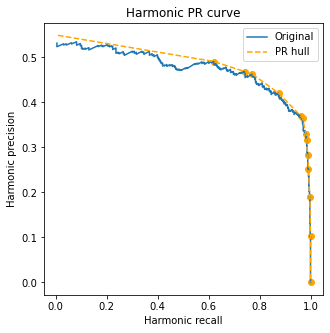

In [58]:
plt.subplots(figsize=(5,5))

# calculate harmonic PR
hrec, hprec = from_roc_to_harmonic_pr(fpr, tpr, r)
hrec_hull, hprec_hull = from_roc_to_harmonic_pr(fpr_hull, tpr_hull, r)
hrec_hull_interp, hprec_hull_interp = from_roc_to_harmonic_pr(x_hull, y_hull, r)

plt.plot(hrec, hprec, label='Original')
plt.scatter(hrec_hull, hprec_hull, color='orange', marker='o')
plt.plot(hrec_hull_interp, hprec_hull_interp, color='orange', linestyle='--', label='PR hull')

plt.xlabel('Harmonic recall'); plt.ylabel('Harmonic precision')
plt.title('Harmonic PR curve')
plt.legend()
plt.show()

We find a very interesting fact: in this plane, **the (ROC) convex hull is mapped to the (harmonic PR) convex hull!** This is a consequence of the more general fact that **straight lines in the ROC plane are straight lines in the harmonic PR plane**.

We prove this in the Theorem below:


**Theorem.** Consider two classifiers $c_A$ and $c_B$ with coordinates $(\mathrm{hRecall_A, hPrecision_A})$ and $(\mathrm{hRecall_B, hPrecision_B})$ in the harmonic PR plane. Then, for any point in the segment between $c_A$ and $c_B$, with coordinates $(\mathrm{hRecall_*, hPrecision_*})$, there is a classifier $c_*$ which can be obtained as follows.

First, let 

$$\displaystyle \mu = \mathrm{\frac{hRecall_*-hRecall_B}{hRecall_A - hRecall_B}} = \mathrm{\frac{hPrecision_*-hPrecision_B}{hPrecision_A - hPrecision_B}}$$ 

(so that $c_*$ is at a normalized distance $\mu$ from $c_B$ and $1-\mu$ from $c_A$). Also let 

$$\lambda = \frac{\mu \mathrm{TPR_B}}{\mu \mathrm{TPR_B} + (1-\mu) \mathrm{TPR_A}}$$

Then, the classifier given by

$$c_*(x) = \begin{cases}
c_A(x) & \mbox{with probability}\; \lambda\\
c_B(x) & \mbox{with probability}\;1-\lambda
\end{cases}$$

has the desired values for $\mathrm{hRecall, hPrecision}$. As we saw in the ROC session, the classifier above is one in the straight line segment between $c_A$ and $c_B$ in the ROC plane.

*Proof*: we start by noticing that

$$\mathrm{hPrecision = 1 - \frac{FPR}{TPR}},$$ 

which is easy to prove by using the fact that

$$\mathrm{Precision} = \frac{\mathrm{TPR}}{\mathrm{TPR}+\mathrm{FPR}/r}$$

(where $r = \mathbb P(Y=1)/\mathbb P(Y=0) = \pi/(1-\pi)$ is the imbalance ratio and  $\pi = \mathbb P(Y=1)$ is the prevalence).
Now, from our discussion on the ROC curve, we know the classifier $c_*$ built above has a false positive rate of

$$\mathrm{FPR}[c_*] = \lambda \mathrm{FPR_A} + (1-\lambda) \mathrm{ FPR_B},$$ 

and analogously for the true positive rate. Then, its harmonic precision equals (we will only do the derivation for precision; that of recall follows analogously)

$$\begin{align}
\mathrm{hPrecision}[c_*] &= 1 - \frac{\mathrm{TPR}[c_*]}{\mathrm{FPR}[c_*]}\\
&= 1 - \frac{\lambda \mathrm{FPR_A} + (1-\lambda) \mathrm{FPR_B}}{\lambda \mathrm{TPR_A} + (1-\lambda) \mathrm{TPR_B}}\\
&=\frac{\lambda \mathrm{TPR_A} + (1-\lambda) \mathrm{TPR_B} -\lambda \mathrm{FPR_A} - (1-\lambda) \mathrm{FPR_B}}{\lambda \mathrm{TPR_A} + (1-\lambda) \mathrm{TPR_B}}\\
&= \frac{1}{\lambda \mathrm{TPR_A} + (1-\lambda) \mathrm{TPR_B}} \left[ \lambda \mathrm{TPR_A} \left( 1 - \mathrm{\frac{TPR_A}{FPR_A}} \right) + (1-\lambda) \mathrm{TPR_B} \left( 1 - \mathrm{\frac{TPR_B}{FPR_B}} \right) \right]\\
&= \frac{\lambda \mathrm{TPR_A}}{\lambda \mathrm{TPR_A} + (1-\lambda) \mathrm{TPR_B}} \mathrm{hPrecision_A} + \frac{(1-\lambda) \mathrm{TPR_B}}{\lambda \mathrm{TPR_A} + (1-\lambda) \mathrm{TPR_B}} \mathrm{hPrecision_B}\\
&= \mu \, \mathrm{hPrecision_A} + (1-\mu) \, \mathrm{hPrecision_B}
\end{align}$$

where we have inverted the definition of $\lambda$ to give 

$$\mu = \frac{\lambda \mathrm{TPR_A}}{\lambda \mathrm{TPR_A} + (1-\lambda) \mathrm{TPR_B}}.$$

Finally, applying the original definition of $\mu$, we find $\mathrm{hPrecision}[c_*] = \mathrm{hPrecision}_*$ as claimed.

The cool thing about this is that we can construct hulls in the harmonic PR plane in the exact same way we do for the ROC plane, and they will still be meaningful.

*Exercise*: we showed above that 

$$\mathrm{hPrecision} = 1 - \frac{\mathrm{FPR}}{\mathrm{TPR}}.$$

Show analogously that

$$\mathrm{hRecall} = 1 - \frac{\pi}{1-\pi} \mathrm{\frac{FNR}{TPR}}.$$ 

*Hint*: use that $\mathrm{FNR + TPR} = 1$. Can you see why?

### Baseline for the harmonic PR plane

It becomes clear from the previous discussion that, **in the scenario we want to find classifiers which maximize $F_1$**, our baseline is the all-positive classifier lying in the bottom right corner of the PR plane, as well as all classifiers in the boundary parabola which share the same $F_1$ value with it.

Below, we plot our old friend, the logistic regression model; an improved gradient boosting model; and the baseline.

In [59]:
# Train better model for the sake of comparison
hist_model = HistGradientBoostingClassifier()
hist_model.fit(X_train, y_train)
y_test_pred_hist = hist_model.predict_proba(X_test)[:,1]

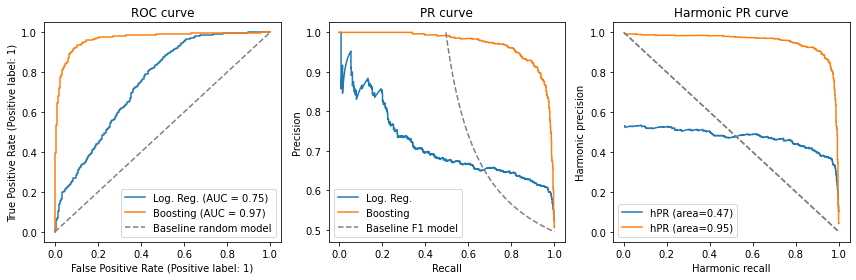

In [60]:
fig, ax = plt.subplots(figsize=(12,4), ncols=3)

## ROC plane
RocCurveDisplay.from_predictions(y_test, y_test_pred, ax=ax[0], name='Log. Reg.')
RocCurveDisplay.from_predictions(y_test, y_test_pred_hist, ax=ax[0], name='Boosting')
x = np.linspace(0,1)
ax[0].plot(x,x, linestyle='--', color='gray', label='Baseline random model' )
ax[0].set_title("ROC curve")
ax[0].legend()

## PR plane
# PR curve
prec, rec, _ = precision_recall_curve(y_test, y_test_pred)
prec_hist, rec_hist, _ = precision_recall_curve(y_test, y_test_pred_hist)

# baseline curve
pi = y_test.mean()
x = np.linspace(pi,1)
y = 1/(-1/x + (1+1/pi))

ax[1].plot(rec, prec, label='Log. Reg.')
ax[1].plot(rec_hist, prec_hist, label='Boosting')
ax[1].plot(x, y, linestyle='--', color='gray', label='Baseline F1 model')
ax[1].set_title("PR curve")
ax[1].set_xlabel("Recall"); ax[1].set_ylabel("Precision")
ax[1].legend()

## harmonic PR plane
plot_harmonic_precision_recall(y_test, y_test_pred, ax[2])
plot_harmonic_precision_recall(y_test, y_test_pred_hist, ax[2])
ax[2].set_title("Harmonic PR curve")
ax[2].set_xlabel("Harmonic recall"); ax[2].set_ylabel("Harmonic precision")
ax[2].legend()

plt.tight_layout()
plt.show()

Notice how the gradient boosting model is evidently superior to the logistic regression model, and how the analysis is simpler in the harmonic PR plane. In fact, its area is about twice as large as that of the logistic regression - which leads us to our next discussion, the interpretation of this area.

> Before we finish: we leave a `sklearn`-friendly metric which can be used for model evaluation

In [61]:
def harmonic_auc(y_true, y_probs):
    """Calculates the area under the harmonic PR curve"""
    from sklearn.metrics import auc
    
    hprec, hrec, _ = harmonic_precision_recall(y_true, y_probs)
    return auc(hrec, hprec)

In [ ]:
def roc_pr_hpr_report(y_true, y_probs, ascending_gain=False):
    
    fig, ax = plt.subplots(figsize=(12,4), ncols=3)

    ## ROC plane (+ gain curve)
    plot_roc_and_gain(y_true, y_probs, ax=ax[0], ascending=ascending_gain)
    ax[0].set_title("ROC + gain curve")
    ax[0].legend()

    ## PR plane
    # PR curve
    prec, rec, _ = precision_recall_curve(y_true, y_probs)

    # baseline curve
    pi = y_true.mean()
    x = np.linspace(pi,1)
    y = 1/(-1/x + (1+1/pi))

    ax[1].plot(rec, prec, label='Model')
    ax[1].plot(x, y, linestyle='--', color='gray', label='Baseline F1 model')
    ax[1].set_title("PR curve")
    ax[1].set_xlabel("Recall"); ax[1].set_ylabel("Precision")
    ax[1].legend()

    ## harmonic PR plane
    plot_harmonic_precision_recall(y_true, y_probs, ax[2])
    ax[2].set_title("Harmonic PR curve")
    ax[2].set_xlabel("Harmonic recall"); ax[2].set_ylabel("Harmonic precision")
    ax[2].legend()

    plt.tight_layout()
    plt.show()

### Harmonic $F_\beta$ & the area under the harmonic PR curve

**Definition.** The harmonic $F_\beta$ score is the harmonic rescaling of $F_\beta$:

$$hF_\beta = \mathrm{hScale}(F_\beta, \pi_1, 1)$$

**Lemma**. $hF_\beta$ is linear as a function of harmonic precision and recall: 

$$\boxed{hF_\beta = \frac{1}{1+\beta^2} (\mathrm{hPrecision} + \beta^2 \mathrm{hRecall})}$$

> Proof is left to the reader! :)

With the definition of $hF_\beta$, we can prove a very interesting result relating the area under the harmonic PR curve (AUhPR) with the expected $hF_\beta$:

**Theorem.** Under some technical assumptions, **$\mathbb{E}[hF_\beta]$ is a linear function of AUhPR**, and thus **maximizing AUhPR is a strategy to finding the best model**.

The proof is technical and left in the Appendix.

## Takeaways

We have introduced harmonic scalings of precision and recall as new versions of these variables which inherit (partially) some of the good properties of the ROC curve: convexity, existence of a baseline, and probabilistically interpretable area. 

---

# Appendix

**Theorem.** Under some technical assumptions, **$\mathbb{E}[hF_\beta]$ is a linear function of AUhPR**, and thus **maximizing AUhPR is a strategy to finding the best model**.

The proof is split into two parts:
* First we construct a (simplified) probability measure, that facilitates the calculation of the expectation
* Then, we actually calculate this expectation and show that it equals the area under the harmonic PR curve

*Review: probability measures*. In probability, one usually considers a cumulative density function (CDF) $F$ such that 

$$\lim_{x\to-\infty} F(x) = 0,\qquad \lim_{x\to\infty} F(x) = 1$$ 

and is right-continuous. The measure is then $dF(x) = f(x) dx$ where $f(x) = F'(x)$, when it exists, is called the probabiliity density function (PDF). Notice that, if one is given some function $G$, it can be made into a measure if it is (1) at least right-continuous (2) monotonically increasing and (3) it is bounded. Under these assumptions, $G$ converges for $x \to \pm\infty$ and we can construct a measure from it.

*Proof of part 1 (building a probability measure)*
Let $\pi = \mathbb P(Y=1)$ and 

$$\Delta(\lambda) = \frac{\mathrm{hPrecision}(\lambda)}{1-\pi} - \frac{\mathrm{hRecall}(\lambda)}{\pi}.$$

This function is bounded: since $\mathrm{hPrecision} = 0$ and $\mathrm{hRecall} = 1$ in the bottom-right corner, $\Delta = -1/\pi$ there; on the other hand, on the upper left corner $\mathrm{hRecall} = 0$, and harmonic precision reaches a value we will call $y_0 \in [\pi, 1]$, and so at that point $\Delta = y_0/(1-\pi)$.

We shall prove that, as the threshold $\lambda$ increases, $\Delta$ grows at every point, namely if $\lambda'> \lambda$,

$$\Delta(\lambda ')- \Delta(\lambda) \geq 0$$.

Using that

$$\mathrm{hPrecision = 1- \frac{FPR}{TPR}},\qquad \mathrm{hRecall} = - \frac{\pi}{1-\pi} \frac{1}{\mathrm{TPR}} - \mathrm{const.}$$

We obtain

$$\begin{align}
\Delta(\lambda') - \Delta(\lambda) &=  \frac{1}{1-\pi} \left(\mathrm{ - \frac{FPR'}{TPR'} + \frac{FPR}{TPR}} \right) - \frac{1}{1-\pi} \left(\mathrm{-\frac{1}{TPR'} + \frac{1}{TPR}    }\right)
\end{align}$$

Adding and subtracting $\mathrm{FPR/TPR'}$ to the expression inside the parenthesis, we get

$$\Delta(\lambda') - \Delta(\lambda) =  \frac{1}{1-\pi} \left[ \mathrm{\frac{(1-FPR)(TPR-TPR')}{TPR\, TPR'} + \frac{FPR-FPR'}{TPR}    } \right]$$

The RHS is positive. To see this, notice we are now in the ROC plane, going from a lower threshold point $\mathrm{(FPR, TPR)}$ to $\mathrm{(FPR', TPR')}$ - but the ROC curve runs "from northeast to southwest", and so $\mathrm{TPR - TPR'} \geq 0$ and $\mathrm{FPR - FPR'} \geq 0$. Also, $1 - \mathrm{FPR} \geq 0$ since $\mathrm{FPR} \in [0,1]$, and all quantities are non-negative. Hence, we have proven that $\lambda \mapsto \Delta(
\lambda)$ increases. It is bounded by construction, and continuous, and so can be made into a measure.

**We will assume $\Delta$ is uniformly distributed over** $[-1/\pi, y_0/(1-\pi)]$. If we do so, we can build a measure from simple normalization:

$$\frac{d\Delta}{\displaystyle \int_{-1/\pi}^{y_0/(1-\pi)} d\Delta} = \frac{d\Delta}{\displaystyle \frac{y_0}{1-\pi} + \frac{1}{\pi}}$$ 

> Recall: a variable $X$ uniformly distributed on an interval $[a,b]$ (denoted by $X\sim\mathrm{Uniform}([a,b])$) has PDF $f(x) = \frac{1}{b-a}$ or, equivalently, our probability measure is $dF(x) = \frac{dx}{b-a}$ with support on $[a,b]$.

> We do we assume this uniformity? Honestly, because it makes our calculations easier; it is also the least informative prior we can put on our knowledge of $\Delta$. In principle, we could have chosen a different PDF for it (with a function $f(\Delta)$ which integrates to 1), but for now it suffices to consider the uniform case.

*Proof of part 2 (calculate expectation)*: we can write $\mathbb E[hF_\beta]$ as

$$\mathbb E[hF_\beta] = \frac{1}{\displaystyle \left(\frac{y_0}{1-\pi} + \frac{1}{\pi} \right)} \int_{-1/\pi}^{y_0/(1-\pi)} hF_\beta d\Delta$$ 

Using that $hF_\beta$ is linear in harmonic PR,

$$hF_\beta = \frac{1}{1+\beta^2} (\mathrm{hPrecision} + \beta^2 \mathrm{hRecall}),$$



we can plug it in and calculate the integral. To avoid having both $\mathrm{hPrecision}\, d\Delta$ and $\mathrm{hRecall}\, d\Delta$ terms, we use a trick to make $\Delta$ appear: from its definition, write

$$\mathrm{hRecall} = \frac{\pi}{1-\pi} \mathrm{hPrecision} - \pi \Delta$$

so that we are left with one integral of the form $\mathrm{hPrecision} \, d\Delta$ and another of $\Delta \, d\Delta$, the latter which is trivially integrated to $\Delta^2/2$. For the former one, again we use the definition of $\Delta$ to write

$$d\Delta = \frac{1}{1-\pi} d\mathrm{hPrecision} - \frac{1}{\pi} d\mathrm{hRecall}$$

and have

$$\begin{align}
\int \mathrm{hPrecision} \, d\Delta &= \frac{1}{1-\pi} \int \mathrm{hPrecision} \, d\mathrm{hPrecision} - \frac{1}{\pi} \int \mathrm{hPrecision} \, d\mathrm{hRecall}\\
&= \frac{1}{1-\pi} \left[\frac{\mathrm{hPrecision}^2}{2}\right] - \frac{1}{\pi} \mathrm{AUhPR}
\end{align}$$

where we have obtained the area under the harmonic PR curve in the last integral. Putting everything together through a lot of algebra yields

$$\mathbb E[hF_\beta] = \frac{\displaystyle (1-\pi+\beta^2) \left[\mathrm{AUhPR} + \frac{\pi y_0^2 + \beta^2 - \pi \beta^2}{2(1+\beta^2)} \right]}{(1+\beta^2)(1 - \pi + \pi y_0)}$$

This is a horrible expression, but it is **linear in AUhPR**, and that is what really matters. For any $\beta$ we choose, the area under the harmonic PR curve will optimize its expected value.

### References


Peter A. Flach and Meelis Kull, *Precision-Recall-Gain Curves: PR Analysis Done Right*, NeurIPS 2015. http://people.cs.bris.ac.uk/~flach/PRGcurves//
* In this original paper (and Supplementary material) the authors present what they call the precision/recall-gain (which we have renamed to harmonic precision/recall). Our chapter here was basically a rewriting, with some additional steps and interpretations.